In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stat
import scipy.integrate as integrate
import scipy.optimize as opt
from scipy.interpolate import interp1d
import seaborn as sns
from sklearn import linear_model

# Tutorial 4 : Continuous degradation modelling, Prognostics and Remaining Useful Life

## Exercice 2


Let us consider an homogeneous Gamma degradation process with mean parameter $\alpha$ and scale parameter $\beta$. <br>
We have $E[X(t)] = \frac{\alpha t}{\beta}$ and $Var[X(t)] = \frac{\alpha t}{\beta^2}$. An item undergoes continuous degradation that can be modelled using such a Gamma process. The item will fail if its health indicator $X(t)$ is above a given threshold $L=100$.

1. What are the properties of the increments of a gamma process?

<font color=red>it is a pure-jump increasing Lévy process with intensity measure ${ \nu (x)=\gamma x^{-1}\exp(-\lambda x),}$</font>

2. Simulate trajectories from a gamma process with $\alpha = 0.2$, $\beta = 0.4$, (such that $E[X(t=200)]=100$)

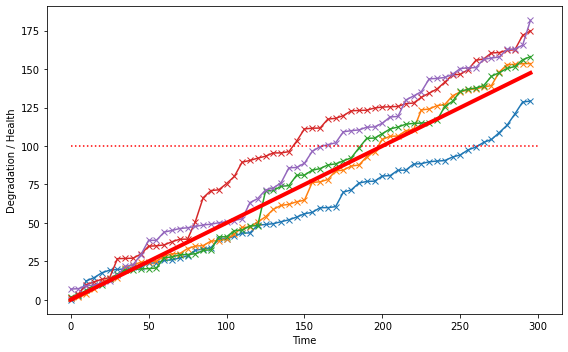

In [6]:
# Simulation of gamma paths

nsize = 60 # Number of time step
dt = 5
tmax = nsize*dt
ymax = 100
tt = np.arange(0,tmax,dt)

alpha = 0.2
beta = 0.4

nrep = 5 # number of path

gam_rv = stat.gamma.__call__(a = alpha*dt, scale = 1/beta) #Define gamma random variable
y_rnd = np.cumsum(gam_rv.rvs(size = (nsize,nrep)),0) # Generate a gamma rv matrix and do summe for each path.

Ex = lambda t: (alpha/beta)*t

plt.figure(figsize=(8,5))
plt.plot(tt,np.reshape(y_rnd,(nsize,nrep)),'x-')
plt.plot(tt,Ex(np.arange(0,tmax,dt)),'r',lw = 4)
plt.plot(np.array([0,tmax]),np.array([1,1])*ymax,':r')
plt.xlabel('Time')
plt.ylabel('Degradation / Health')

plt.tight_layout()
# plt.savefig('Fig7.eps',format = 'eps')
plt.show()

3. Given that the item will fail if $\exists t, X(t)>L$, use the simulated trajectories to build an histogram of the time to failure of the item. 

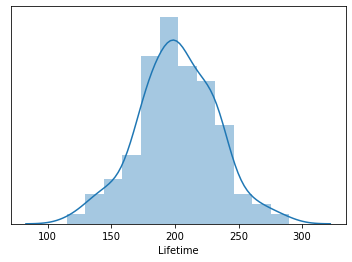

In [4]:
# Empirical calculation of failure time distribution

nrep = 200
ymax = 100
y_rnd = np.cumsum(gam_rv.rvs(size = (nsize,nrep)),0)

failtime = []
for i in range(y_rnd.shape[1]):
    failtime = np.append(failtime,np.min(tt[y_rnd[:,i]>ymax]))

sns.distplot(failtime)
plt.xlabel('Lifetime')
plt.yticks([])
plt.show()

4. Assuming we are able to measure the degradation level at time $\tau=100$ and assuming that we know $X(\tau)$, simulate trajectories from $(\tau, X(\tau))$ and build an histogram of the Remaining Useful Life at time $\tau$. 

5. Compare both histograms above and comment on the utility of condition monitoring or inspection.

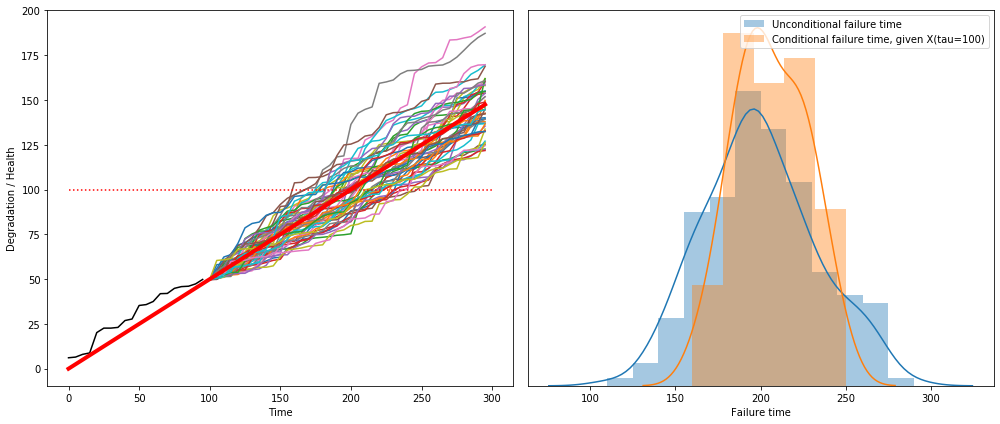

In [5]:
nsize = 60
tau = 100
nrep = 50
nrep2 = 200

y_rnd1 = np.cumsum(gam_rv.rvs(size = (nsize,1)),0) # To generate a first path 
y_rnd2 = np.cumsum(gam_rv.rvs(size = (nsize,nrep)),0) # To generate several paths
y_rnd2 = y_rnd2 - y_rnd2[tt==tau,:] + np.max(y_rnd1[tt<tau]) # Harmonise from the tt==tau time.

# Uncondition generation
y_rnd3 = np.cumsum(gam_rv.rvs(size = (nsize,nrep2)),0)

failtime = []
for i in range(y_rnd.shape[1]):
    failtime = np.append(failtime,np.min(tt[y_rnd3[:,i]>ymax]))
    
failtimecond = []
for i in range(y_rnd2.shape[1]):
    failtimecond = np.append(failtimecond,np.min(tt[y_rnd2[:,i]>ymax]))

fig, ax = plt.subplots(1,2,figsize=(14,6))
ax[0].plot(tt[tt<tau],y_rnd1[tt<tau],'k')
ax[0].plot(tt[tt>=tau],y_rnd2[tt>=tau,:])
ax[0].plot(np.array([0,tmax]),np.array([1,1])*ymax,':r')
ax[0].plot(tt,Ex(np.arange(0,tmax,dt)),'r',lw = 4)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Degradation / Health')
sns.distplot(failtime,ax=ax[1],label = 'Unconditional failure time')
ax[1].set_xlabel('Failure time')
ax[1].set_yticks([])
sns.distplot(failtimecond,ax=ax[1],label = 'Conditional failure time, given X(tau=100)')
ax[1].legend()

plt.tight_layout()
# plt.savefig('Fig8.eps',format = 'eps')
plt.show()

6. Repeat the operation for different values of $\tau$.

7. (Optional) Discuss methods to estimate the parameters of the gamma process model.